## Logos

https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

https://www.hackzine.org/getting-average-image-color-from-python.html

In [1]:
import os
import PIL
from PIL import Image
from IPython.display import display, Image as IPyImage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
LOGO_DIR = 'data/waas_full_details_dump_files/'
yc_logos = [LOGO_DIR + x for x in os.listdir(LOGO_DIR) if x.endswith('.png')]

In [3]:
def average_img_hex(img):
    """
    https://www.hackzine.org/getting-average-image-color-from-python.html
    """
    img = Image.open(img)
    
    # leave out images not in RGB/RGBA mode
    if img.mode in ["LA", "P", "L"]:
        return
    
    # resize the image to 1 pixel and get the average hex value
    img2 = img.resize((1, 1))
    color = img2.getpixel((0, 0))
    average_hex = '#{:02x}{:02x}{:02x}'.format(*color)
    
    return average_hex

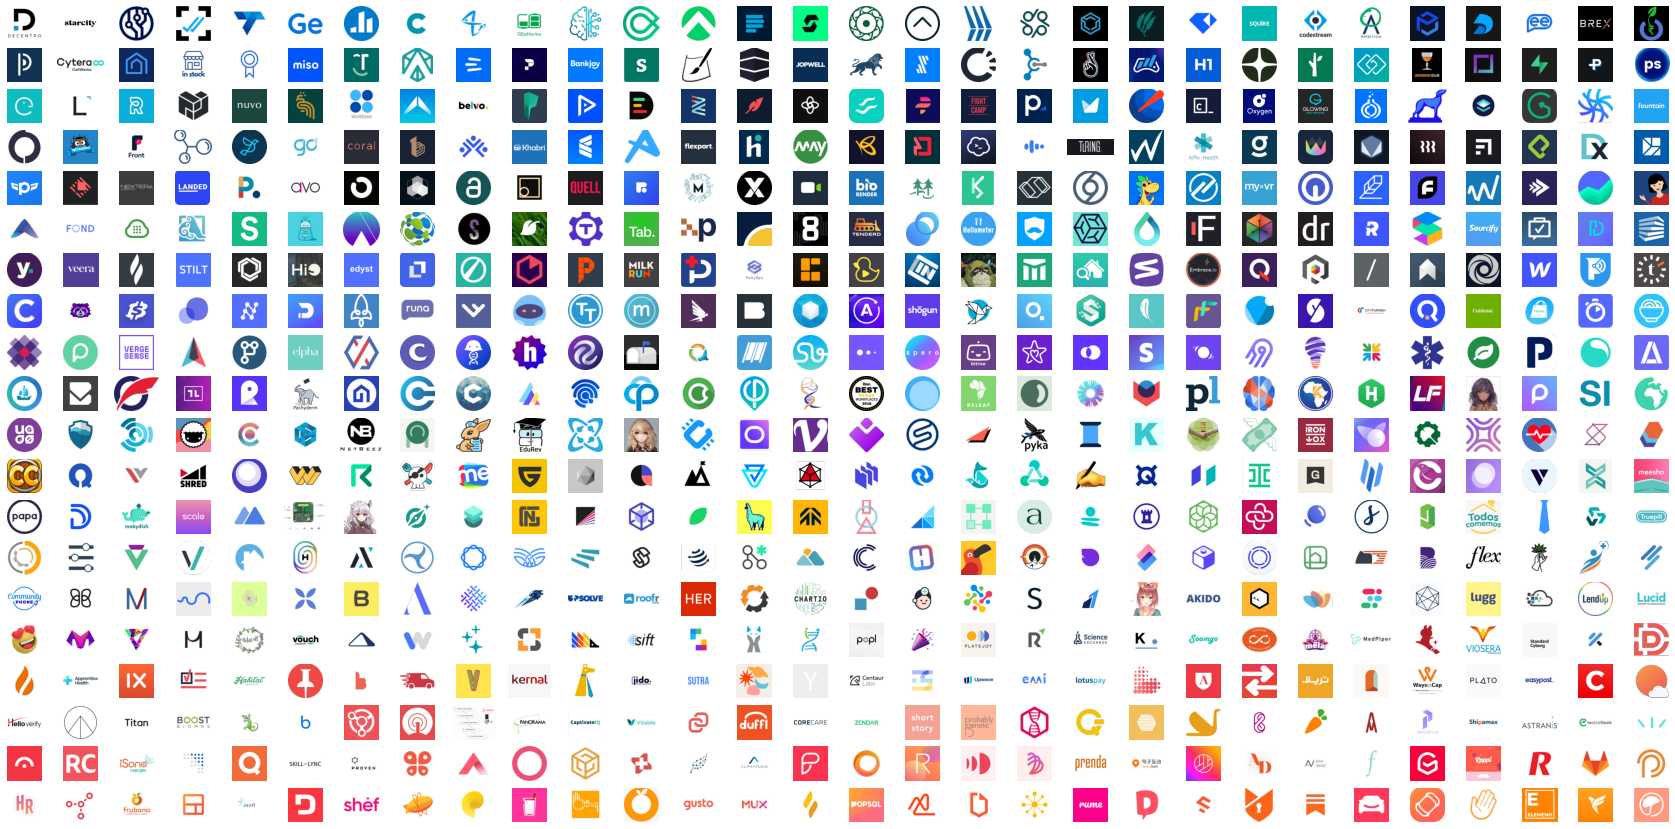

In [6]:
# sort images by average hex value 
sorted_images = sorted(
    [(average_img_hex(img), img) for img in yc_logos if average_img_hex(img) is not None], 
    key=lambda x: x[0]
)

images = sorted_images[:600]

fig, axes = plt.subplots(20, 30, figsize=(30, 15), sharex=False, sharey=False) 

for img, ax in zip(images, axes.flat):
    ax.imshow(mpimg.imread(img[1]))
    ax.axis('off')
    
plt.savefig('yc.png')
plt.show()
